In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
forbes_df= pd.read_csv('2022_forbes_billionaires.csv')
forbes_df

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...,...
2595,2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail


In [4]:
forbes_df.head()

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


In [5]:
forbes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2600 non-null   int64 
 1   rank        2600 non-null   int64 
 2   name        2600 non-null   object
 3   networth    2600 non-null   object
 4   age         2600 non-null   int64 
 5   country     2600 non-null   object
 6   source      2600 non-null   object
 7   industry    2600 non-null   object
dtypes: int64(3), object(5)
memory usage: 162.6+ KB


In [6]:
forbes_df.iloc[0:10]

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
5,5,6,Larry Page,$111 B,49,United States,Google,Technology
6,6,7,Sergey Brin,$107 B,48,United States,Google,Technology
7,7,8,Larry Ellison,$106 B,77,United States,software,Technology
8,8,9,Steve Ballmer,$91.4 B,66,United States,Microsoft,Technology
9,9,10,Mukesh Ambani,$90.7 B,64,India,diversified,Diversified


C:\Users\chakr\AppData\Local\Temp\ipykernel_28764\252465284.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(forbes_df['name'][:10],rotation = 45)


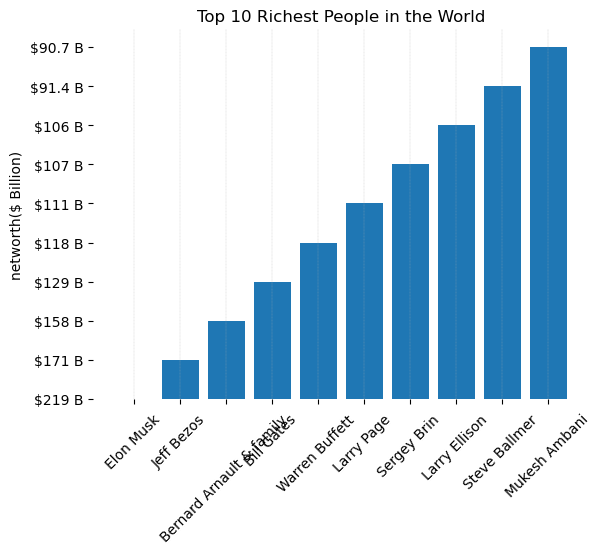

In [7]:
fig,ax=plt.subplots()
ax.bar(forbes_df['name'][:10],forbes_df['networth'][:10])
[s.set_visible(False) for s in ax.spines.values()] #for removing borders
ax.set_title("Top 10 Richest People in the World")
ax.set_ylabel("networth($ Billion)")
ax.set_xticklabels(forbes_df['name'][:10],rotation = 45)
plt.grid(axis = 'x',linestyle = '--',linewidth=0.2)
plt.show()

In [8]:
forbes_df['country'].unique()

array(['United States', 'France', 'India', 'Mexico', 'China', 'Canada',
       'Spain', 'Germany', 'Hong Kong', 'Italy', 'Australia', 'Austria',
       'Japan', 'Indonesia', 'Switzerland', 'Chile', 'Russia',
       'Singapore', 'Sweden', 'Czechia', 'United Kingdom', 'Brazil',
       'Israel', 'Netherlands', 'Ireland', 'Nigeria', 'Denmark',
       'Thailand', 'Cyprus', 'Malaysia', 'Taiwan', 'Monaco', 'Colombia',
       'New Zealand', 'South Korea', 'Belgium', 'South Africa',
       'Philippines', 'Egypt', 'Greece', 'Norway', 'Vietnam', 'Poland',
       'Eswatini (Swaziland)', 'Peru', 'Algeria', 'Kazakhstan', 'Georgia',
       'Portugal', 'Turkey', 'Finland', 'Ukraine', 'Argentina', 'Belize',
       'Venezuela', 'Lebanon', 'Zimbabwe', 'Romania',
       'United Arab Emirates', 'Oman', 'Iceland', 'Guernsey',
       'Liechtenstein', 'Qatar', 'Morocco', 'Bulgaria', 'Macau',
       'Slovakia', 'Barbados', 'Uruguay', 'Nepal', 'Tanzania',
       'St. Kitts and Nevis', 'Hungary', 'Estonia'], dty

In [9]:
forbes_df.groupby('country').size() 


country
Algeria            1
Argentina          6
Australia         44
Austria           11
Barbados           1
                ... 
United States    719
Uruguay            2
Venezuela          1
Vietnam            7
Zimbabwe           1
Length: 75, dtype: int64

In [10]:
len(forbes_df.groupby('country').size())

75

In [11]:
country_counts = forbes_df.groupby('country').size()
country_counts = country_counts.to_frame()
country_counts = country_counts.rename(columns={0:'Count'})
country_counts = country_counts.sort_values(by='Count',ascending = False)
country_counts

,Count
country,
United States,719
China,515
India,161
Germany,130
Russia,81
...,...
Eswatini (Swaziland),1
Estonia,1
Belize,1


C:\Users\chakr\AppData\Local\Temp\ipykernel_28764\4185774060.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels = country_counts.index,rotation = 90)


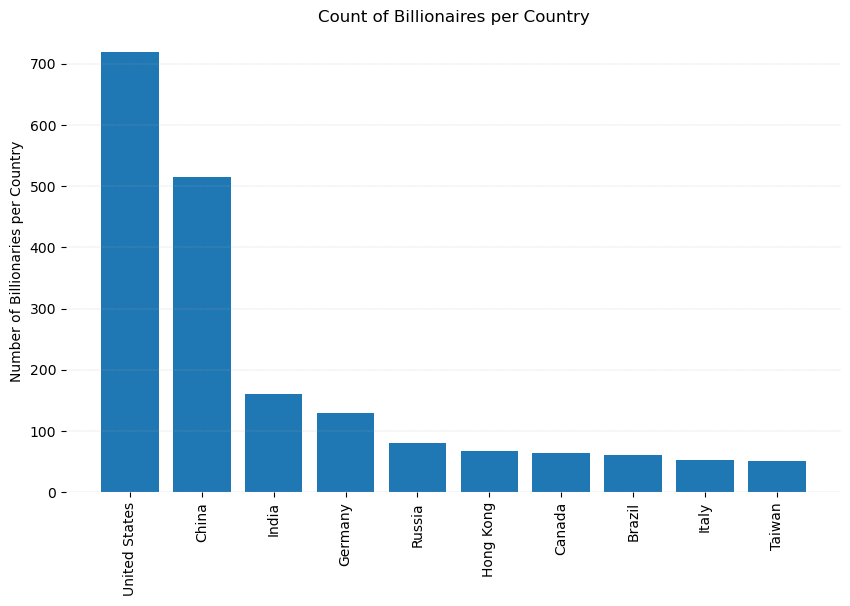

In [12]:
fig,ax2 = plt.subplots(figsize=(10,6))
ax2.bar(country_counts.index[:10],country_counts['Count'][:10])
[s.set_visible(False) for s in ax2.spines.values()]
ax2.set_title("Count of Billionaires per Country")
ax2.set_ylabel("Number of Billionaries per Country")
ax2.set_xticklabels(labels = country_counts.index,rotation = 90)
plt.grid(axis = 'y',linestyle = '--',linewidth = 0.2)
plt.show()

In [13]:
forbes_df['industry'].unique()

array(['Automotive ', 'Technology ', 'Fashion & Retail ',
       'Finance & Investments ', 'Diversified ', 'Media & Entertainment ',
       'Telecom ', 'Food & Beverage ', 'Logistics ', 'Real Estate ',
       'Metals & Mining ', 'Manufacturing ', 'Gambling & Casinos ',
       'Healthcare ', 'Service ', 'Energy ',
       'Construction & Engineering ', 'Sports '], dtype=object)

In [14]:
forbes_df['source'].unique()

array(['Tesla, SpaceX', 'Amazon', 'LVMH', 'Microsoft',
       'Berkshire Hathaway', 'Google', 'software', 'diversified',
       'infrastructure, commodities', 'Bloomberg LP', 'telecom',
       "L'Oréal", 'Facebook', 'Walmart', 'beverages, pharmaceuticals',
       'cryptocurrency exchange', 'Koch Industries', 'Zara',
       'Dell computers', 'TikTok', 'media', 'Nike', 'retail', 'batteries',
       'shipping', 'luxury goods', 'internet media', 'supermarkets',
       'Nutella, chocolates', 'investments', 'real estate',
       'music, chemicals', 'candy, pet food', 'Chanel', 'mining',
       'software services', 'hedge funds', 'home appliances', 'casinos',
       'Red Bull', 'eyeglasses', 'fashion retail', 'online games',
       'BMW, pharmaceuticals', 'vaccines', 'package delivery',
       'pig breeding', 'sensors', 'automobiles', 'cheese',
       'banking, tobacco', 'Estee Lauder', 'fintech', 'e-commerce',
       'Quicken Loans', 'hospitals', 'internet, telecom',
       'money management

In [15]:
industry_count=forbes_df.groupby('industry').size()

In [16]:
industry_count = industry_count.to_frame()
industry_count = industry_count.rename(columns={0:'count'})
industry_count = industry_count.sort_values(by='count',ascending = False)

In [17]:
industry_count

,count
industry,
Finance & Investments,386
Technology,329
Manufacturing,322
Fashion & Retail,246
Healthcare,212
Food & Beverage,201
Real Estate,189
Diversified,178
Media & Entertainment,95


In [18]:
source_count=forbes_df.groupby('source').size()

In [19]:
source_count = source_count.to_frame()
source_count = source_count.rename(columns={0:'count'})
source_count= source_count.sort_values(by='count',ascending = False)

In [20]:
source_count

,count
source,
real estate,148
investments,93
pharmaceuticals,91
diversified,83
software,57
...,...
"energy, sports",1
"engineering, automotive",1
"engineering, construction",1


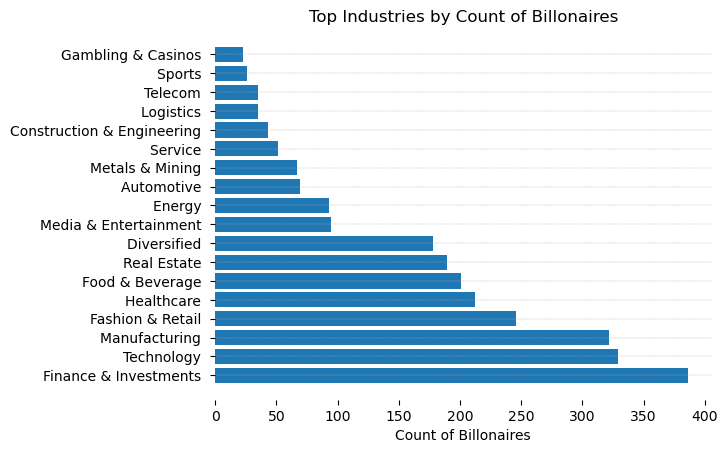

In [21]:
fig,ax4=plt.subplots()
[s.set_visible(False) for s in ax4.spines.values()]
ax4.barh(industry_count.index,industry_count['count'])
ax4.set_title('Top Industries by Count of Billonaires')
ax4.set_xlabel('Count of Billonaires')
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()


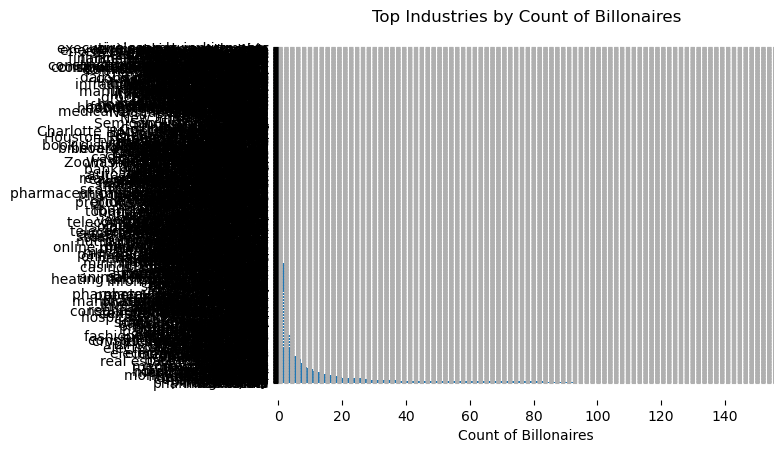

In [22]:
fig,ax4=plt.subplots()
[s.set_visible(False) for s in ax4.spines.values()]
ax4.barh(source_count.index,source_count['count'])
ax4.set_title('Top Industries by Count of Billonaires')
ax4.set_xlabel('Count of Billonaires')
plt.grid(axis='y',linestyle='--',linewidth=0.8)
plt.show()


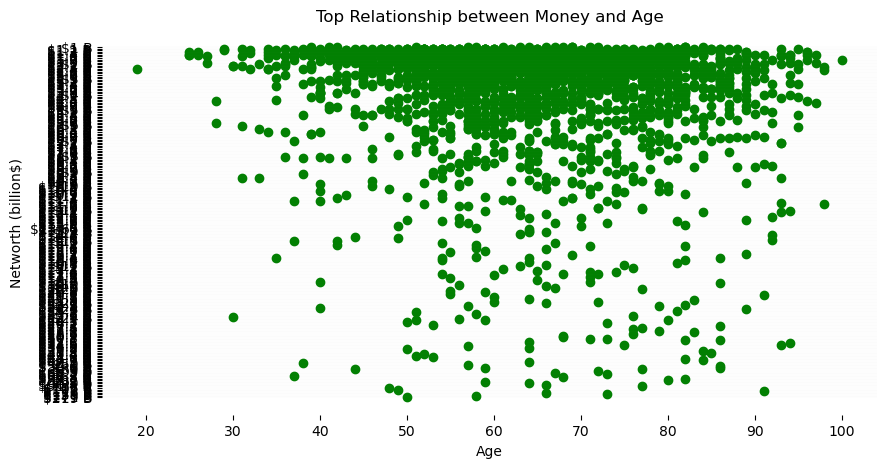

In [26]:

fig,ax5=plt.subplots(figsize=(10,5))
ax5.scatter(forbes_df['age'],forbes_df['networth'],color='green')
[s.set_visible(False) for s in ax5.spines.values()]
ax5.set_title('Top Relationship between Money and Age')
ax5.set_xlabel('Age')
ax5.set_ylabel('Networth (billion$)')
plt.grid(axis='y',linestyle='--',linewidth=0.03)
plt.show()